# Electric car price prediction

# DSBDA Mini project

# Roll no : 33202, 33206, 33207

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#  Business Understanding

In [2]:
df1= pd.read_csv(r"C:\Users\Aney\Downloads\Cheapestelectriccars-EVDatabase.csv")
df1

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
...,...,...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,Battery Electric Vehicle | 65 kWh,7.9 sec,200 km/h,340 km,191 Wh/km,390 km/h,Rear Wheel Drive,5,"€40,000",NaN
176,Tesla Model 3 Long Range Dual Motor,Battery Electric Vehicle | 76 kWh,4.4 sec,233 km/h,490 km,155 Wh/km,820 km/h,All Wheel Drive,5,"€53,560",NaN
177,MG MG5 EV Long Range,Battery Electric Vehicle | 57 kWh,7.7 sec,185 km/h,340 km,168 Wh/km,340 km/h,Front Wheel Drive,5,NaN,"£26,495"
178,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9 sec,180 km/h,385 km,199 Wh/km,470 km/h,All Wheel Drive,5,"€50,900",NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


### Exploratory Data Analysis for Electric Vehicle Price Prediction Data

# Data Preparation and Data Cleaning

In [4]:
print(df1.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [5]:
#filling empty data with 0
df1=df1.fillna('0')

# Data Pre-processing

In [6]:
df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]

In [7]:
#cleaning the data
#removing currency sign
PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

In 3rd line we use `.replace` 2 times as we want to remove the '£' sign as well as ',' if any

AND then we are converting the whole value from string to int

### Here, we removed the pound symbol, next we will do the same for Euros.

In [8]:
PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

In 3rd line we use `.replace` 2 times as we want to remove the '€' sign as well as ',' if any

AND then we are converting the whole value from string to int

### Now, we will prepare the data for Fast Charging Speed and other attributes

In [9]:
FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed

In [10]:
Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency

In [11]:
Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range

In [12]:
TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed

In [13]:
Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration

In [14]:
Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

In [15]:
df1= df1.rename(columns = {'Subtitle':'KWH'})
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


One thing to be pointed is that many data points are missing. Let us take only the prices in UK Pound.

Considering 1 Euro = 0.85 Pound


In [17]:
c=0
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)       

Empty Values: 44


In [18]:
pd.options.mode.chained_assignment = None

In [19]:
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val
        

# Data Understanding and Visualization

In [20]:
df1.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.707831
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.571238
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.773806
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.675257
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.270454
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.649172
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.007434
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.915390
PriceinUK,0.707831,-0.571238,0.773806,0.675257,0.270454,0.649172,-0.007434,0.915390,1.000000


 `df1.corr()` is used to find the pairwise correlation of all columns in the dataframe.

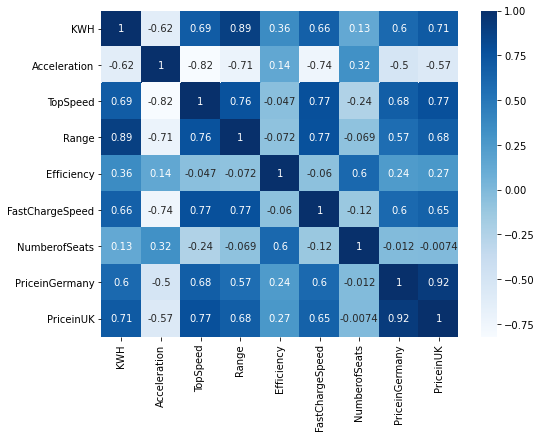

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True,cmap='Blues')
plt.show()

We get many insights about the dataset by heatmap plotting  
such as :
there is high relation between parameters like `FastChargeSpeed` and `Range`

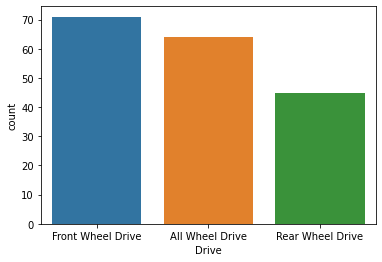

In [22]:
sns.countplot(x = 'Drive', data = df1)
plt.show()

We get the idea that `Front Wheel drive` type car is the most popular type amongst others

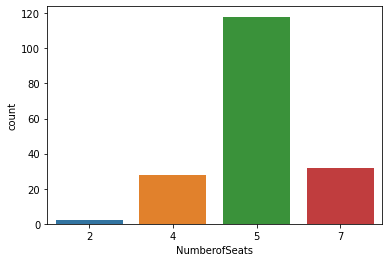

In [23]:
sns.countplot(x = 'NumberofSeats', data = df1)
plt.show()

This plot gives us the idea that the Most of the EV cars are targeted to the family type cars as it is having 5 seater to be manufactured the most. 

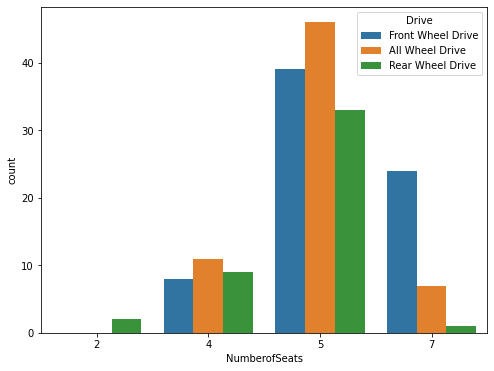

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)
plt.show()

This plot is very insightful as it uses the power of distribution of Number of seats the car has and Each drive type of car respectively.

As we can see nearly all cars(having different number of seats)mainly focus on Front wheel and All wheel drive


We get the idea that 6 seater mainly focus on Front Wheel drive which may suggest that  as more power is needed to drive the car.
This can be explained by a most basic physics concept that " Pulling is easier than pushing. " 

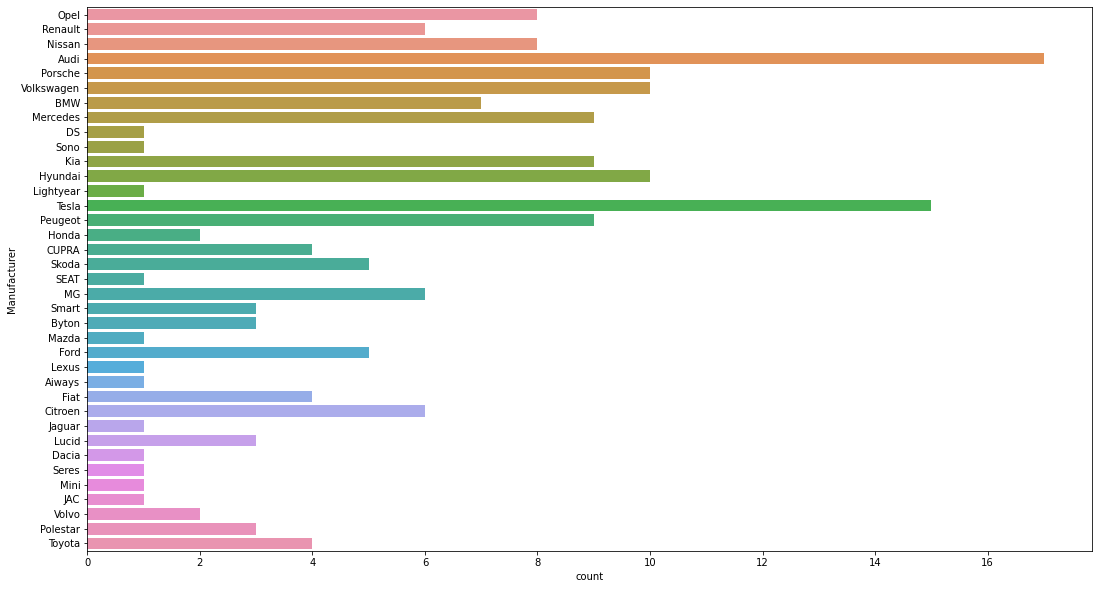

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)
plt.show()

### We can see that Audi and Tesla have the most types of electric vehicles.

As we can see here that Audi and Tesla are the leading companies that manufacture the EV cars while others are struggling to give this much output as compared to other manufacturers.
We may say that there is something that is helping these companies(Audi,Tesla) to maintain suppremacy in EV car production output.
These companies may have:

   * Better production chain
   * Good and effective manufacturation system
   * Strong infrastructure
   * Proper capital management
   * Proper material management

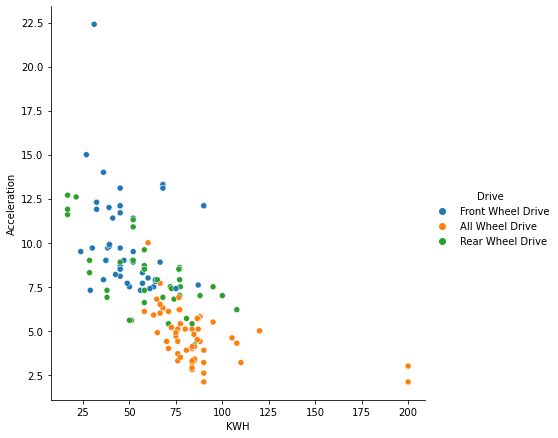

In [26]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)
plt.show()

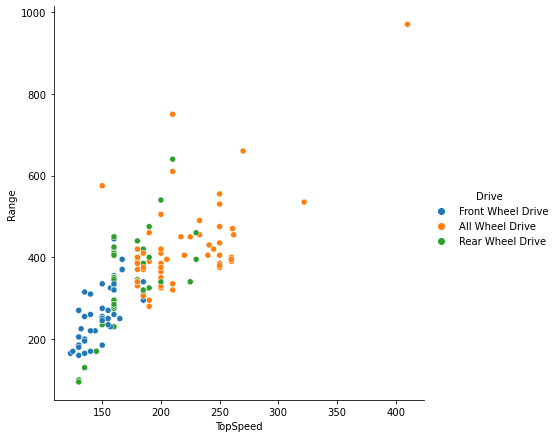

In [27]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)
plt.show()

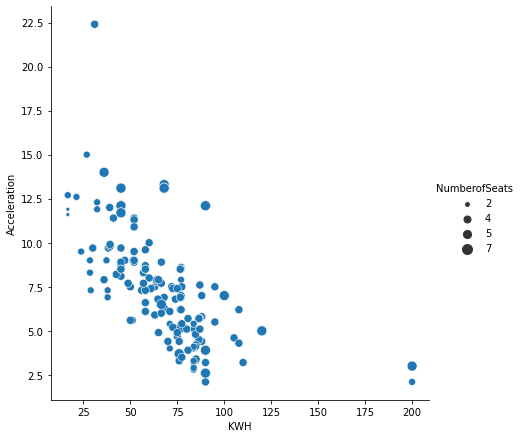

In [28]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)
plt.show()

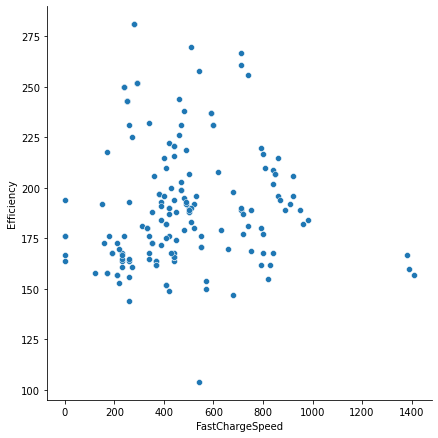

In [29]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)
plt.show()

# Data Modeling

### Machine Learning Model 

We will predict the price of the vehicle based on all the parameters and data such as
    
    KWH
    Acceleration
    TopSpeed
    Range
    Efficiency 
    FastChargeSpeed
    Drive
    NumberofSeats

In [30]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [31]:
conda install -c conda-forge/label/gcc7 category_encoders

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### Data Transformation

In [32]:
import category_encoders as ce

train_df=df1

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])


#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data
df_train.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer,Drive
0,Opel Ampera-e,58.0,7.3,150,335,173,210,5,42990,36541,Opel,1
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,5,0,31680,Renault,1
2,Nissan Leaf,36.0,7.9,144,220,164,230,5,29990,25995,Nissan,1
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,5,0,79900,Audi,3
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,4,186336,138830,Porsche,3


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   NumberofSeats    180 non-null    int64  
 8   PriceinGermany   180 non-null    int64  
 9   PriceinUK        180 non-null    int64  
 10  Manufacturer     180 non-null    object 
 11  Drive            180 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 16.3+ KB


In [34]:
X= df_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   5. ,   1. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   5. ,   1. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   5. ,   1. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   5. ,   1. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   5. ,   3. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   5. ,   2. ]])

In [35]:
y=df_train['PriceinUK'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [37]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [38]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [39]:
y_pred= regressor.predict(X_test)

In [40]:
y_test

array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580], dtype=int64)

In [41]:
y_pred

array([ 54415.93805556,  31081.55888889,  41373.58333333,  45719.96055556,
       114907.79677778,  35321.08222222,  40738.22897222,  32879.78722222,
        53663.095     ,  53890.59666667,  31622.88722222,  49583.29804365,
        40738.22897222,  35397.42302778,  64017.67027778,  49583.29804365,
        46882.61203968,  44247.14666667,  47749.42784127,  26839.50411111,
        53405.42333333,  70162.7042381 ,  74862.43888889,  85596.33333333,
        31820.25527778,  49581.92776587,  33181.65388889,  50388.85428571,
        36651.45777778,  85169.68733333,  26230.90727778,  55832.71611111,
        33181.65388889,  80984.141     ,  23681.117     ,  36547.31333333,
        49581.92776587,  41660.94666667,  31043.26444444,  70772.16677778,
        33251.84244444,  53209.46333333,  54298.20944444,  65152.221     ,
        49583.29804365,  58616.53194444,  23090.66111111,  37186.165     ,
        48103.39416667,  69828.7117381 , 127283.85      ,  53957.17777778,
        32560.63005556,  

# Evaluation

### Accuracy Metrics for Predicted Prices of Electric Vehicle

### Mean Absolute Error:

In [42]:
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7140.720294775131


### Mean Squared Error:

In [43]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  106863055.47146617


### Root Mean Squared Error:

In [44]:
#Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10337.458849807634


### R Squared (R2):

In [45]:
#R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.8177591362332536


As we can see that we are getting the accuracy of nearly 82%

# Conclusion

Model Final accuracy is above 80 % so it can be trusted.

As model used the many of main features that is required to calculate the cost of any car is been considered.

Rainforest Regression model turned to be a successful choice of regression model giving proper results with good accuracy.


Prices are generally high because there is less supply of EV cars in the market.
As time will pass more manufactures will emerge from the local areas with similar features as big companies like Tesla,Audi and hence the price will decrease gradually.